# Simple Feature Selection

## Python Packages

In [3]:
# Data Science
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# ignore all warnings
import warnings
warnings.filterwarnings('ignore')

# data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import chi2

# dataframe set
pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

Firt, let's start with reading the data

In [4]:
df = pd.read_csv('../data/loan_data.csv')
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.00,3600.00,3600.00,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.00,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.00,24700.00,24700.00,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.00,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.00,20000.00,20000.00,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.00,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


Brief stat value of all features:

In [5]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.00,575775.00,575775.00,575775.00,575775.00,575775.00,575775.00,575425.00,575774.00,575774.00,575774.00,575774.00,287285.00,96602.00,575774.00,575774.00,575774.00,575405.00,575774.00,575774.00,575774.00,575774.00,575774.00,575774.00,575774.00,...,575774.00,575774.00,575774.00,23088.00,23088.00,23088.00,23088.00,23088.00,23088.00,22662.00,23088.00,23088.00,23088.00,23088.00,7843.00,3065.00,3065.00,3065.00,3065.00,2498.00,3065.00,3065.00,12165.00,12165.00,12165.00
mean,NaN,15377.33,15377.33,15371.79,12.64,446.92,77344.92,19.33,0.32,697.01,701.01,0.55,34.50,69.38,11.81,0.22,17235.70,51.36,24.75,2856.33,2855.55,13770.12,13764.98,10890.52,2693.87,...,51897.40,23067.82,43942.31,33865.25,667.11,671.11,0.67,1.53,11.59,59.35,3.02,12.74,0.06,0.08,35.51,3.00,131.39,3.00,14.31,390.49,10199.41,189.35,4962.62,47.46,13.03
std,NaN,8998.22,8998.22,8995.46,4.55,257.29,75377.01,13.81,0.89,32.49,32.49,0.84,21.97,25.86,5.70,0.61,23654.23,24.60,12.13,5951.92,5950.81,9910.57,9906.81,8412.97,2751.46,...,49667.63,22908.22,44702.38,27594.65,46.19,46.19,1.04,1.77,6.66,25.70,3.26,8.27,0.46,0.43,23.99,0.00,111.90,0.00,9.50,330.81,6950.74,185.75,3620.23,6.47,7.81
min,NaN,1000.00,1000.00,900.00,5.31,14.01,0.00,0.00,0.00,660.00,664.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,540.00,544.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.64,3.00,0.00,1.92,55.73,0.02,107.00,0.45,0.00
25%,NaN,8400.00,8400.00,8400.00,9.17,260.32,46000.00,12.30,0.00,670.00,674.00,0.00,16.00,52.00,8.00,0.00,6136.00,32.80,16.00,0.00,0.00,6038.91,6036.78,4261.99,880.07,...,21771.00,8100.00,15279.00,15414.75,640.00,644.00,0.00,0.00,7.00,40.90,1.00,7.00,0.00,0.00,14.00,3.00,46.23,3.00,7.00,137.84,4583.37,44.41,2187.00,45.00,6.00
50%,NaN,14000.00,14000.00,14000.00,12.29,384.10,65000.00,18.41,0.00,690.00,694.00,0.00,31.00,70.00,11.00,0.00,11630.00,51.30,23.00,0.00,0.00,11252.21,11247.74,8875.00,1771.46,...,38959.00,16000.00,33108.00,27008.00,665.00,669.00,0.00,1.00,10.00,61.50,2.00,11.00,0.00,0.00,34.00,3.00,102.64,3.00,15.00,307.23,8848.37,135.39,4222.53,45.00,12.00
75%,NaN,20000.00,20000.00,20000.00,15.59,591.18,92000.00,25.29,0.00,715.00,719.00,1.00,51.00,87.00,15.00,0.00,20896.00,70.20,32.00,3275.53,3275.53,19018.57,19010.49,15000.00,3535.18,...,65504.00,30200.00,59031.00,44155.75,695.00,699.00,1.00,2.00,15.00,79.70,4.00,17.00,0.00,0.00,55.00,3.00,182.55,3.00,23.00,538.98,14381.08,284.18,6814.06,50.00,18.00
max,NaN,40000.00,40000.00,40000.00,30.99,1714.54,10999200.00,999.00,39.00,845.00,850.00,6.00,226.00,124.00,90.00,86.00,2904836.00,193.00,169.00,36747.06,36747.06,61184.57,61184.57,40000.00,27309.35,...,2921551.00,834300.00,2101913.00,371153.00,845.00,850.00,6.00,27.00,73.00,434.30,34.00,96.00,17.00,15.00,159.00,3.00,923.40,3.00,30.00,2535.66,40306.41,1247.48,30000.00,166.67,112.00


Total rows/records:

In [6]:
df.shape

(575779, 151)

Total columns/features:

In [7]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

## Handle Missing Value

In [8]:
df.isnull().sum()

id                            0
member_id                575779
loan_amnt                     4
funded_amnt                   4
funded_amnt_inv               4
                          ...  
settlement_status        563614
settlement_date          563614
settlement_amount        563614
settlement_percentage    563614
settlement_term          563614
Length: 151, dtype: int64

There are a lot of features contain missing values. In order to handle 151 features, First, a good idea is binning the percentage of missing value of features, then check each bins ascendingly to decide with percentage of missing values is appropriate.

In [9]:
null_percentages = df.isnull().mean() * 100

bin_edges = [0, 5, 10, 30, 50, 70, 90, 100]
bin_labels = ['0-5%', '5-10%', '10-30%', '30-50%', '50-70%', '70-90%', '90-100%']

binned_features = pd.cut(null_percentages, bins=bin_edges, labels=bin_labels)

binned_data = pd.DataFrame({'Features': null_percentages.index, 'Null Percentage Bin': binned_features})
binned_data.reset_index(inplace=True, drop=True)

Now, we will evaluate each bin

In [10]:
binned_data[binned_data['Null Percentage Bin']=='0-5%']

,Features,Null Percentage Bin
2,loan_amnt,0-5%
3,funded_amnt,0-5%
4,funded_amnt_inv,0-5%
5,term,0-5%
6,int_rate,0-5%
...,...,...
113,total_bc_limit,0-5%
114,total_il_high_credit_limit,0-5%
128,hardship_flag,0-5%
143,disbursement_method,0-5%


In [11]:
binned_data[binned_data['Null Percentage Bin']=='5-10%']

,Features,Null Percentage Bin
10,emp_title,5-10%
11,emp_length,5-10%


In [12]:
binned_data[binned_data['Null Percentage Bin']=='10-30%']

,Features,Null Percentage Bin
91,mths_since_recent_inq,10-30%


In [13]:
binned_data[binned_data['Null Percentage Bin']=='30-50%']

,Features,Null Percentage Bin


In [14]:
binned_data[binned_data['Null Percentage Bin']=='50-70%']

,Features,Null Percentage Bin
30,mths_since_last_delinq,50-70%
63,open_acc_6m,50-70%
64,open_act_il,50-70%
65,open_il_12m,50-70%
66,open_il_24m,50-70%
68,total_bal_il,50-70%
70,open_rv_12m,50-70%
71,open_rv_24m,50-70%
72,max_bal_bc,50-70%
73,all_util,50-70%


In [15]:
binned_data[binned_data['Null Percentage Bin']=='70-90%']

,Features,Null Percentage Bin
31,mths_since_last_record,70-90%
49,next_pymnt_d,70-90%
54,mths_since_last_major_derog,70-90%
67,mths_since_rcnt_il,70-90%
69,il_util,70-90%
90,mths_since_recent_bc_dlq,70-90%


In [16]:
binned_data[binned_data['Null Percentage Bin']=='90-100%']

,Features,Null Percentage Bin
1,member_id,90-100%
19,desc,90-100%
57,annual_inc_joint,90-100%
58,dti_joint,90-100%
59,verification_status_joint,90-100%
115,revol_bal_joint,90-100%
116,sec_app_fico_range_low,90-100%
117,sec_app_fico_range_high,90-100%
118,sec_app_earliest_cr_line,90-100%
119,sec_app_inq_last_6mths,90-100%


- It is appropiate to pick all features from bins 0-5% and 5-10% because they have fewer missing values, and they are meaningful for training the models. There are 91 total features and it is enough for the start. We can evaluate other features after training to see if there is any significant from them. Sometimes, Feature with huge amount of missing value can boost models. <br>
- I won't process the filtering missing value in this notebook since we have 3 different models and the cleaning process should be separate, but the first step of picking features by filtering missing value can be together <br>
- Before EDA, let's gather all the selected Features


In [18]:
FIRST_SELECTED_FEATURES = binned_features[binned_features.isin(['0-5%', '5-10%'])].index.tolist()
%store FIRST_SELECTED_FEATURES

Stored 'FIRST_SELECTED_FEATURES' (list)


In [ ]:
numerical_features = df.select_dtypes(include=['int', 'float']).columns

categorical_features = df.select_dtypes(include=['object']).columns


since there are 3 main models: PD, LGD, and EAD, Let's start with PD first
## Probability of Defalt
The target for pd is loan_status which is the status of to consider if it is default or not. <br>
First, Let's begin with heat map since it the easiest way to obsesrve all correlation among numerical features

<AxesSubplot:>

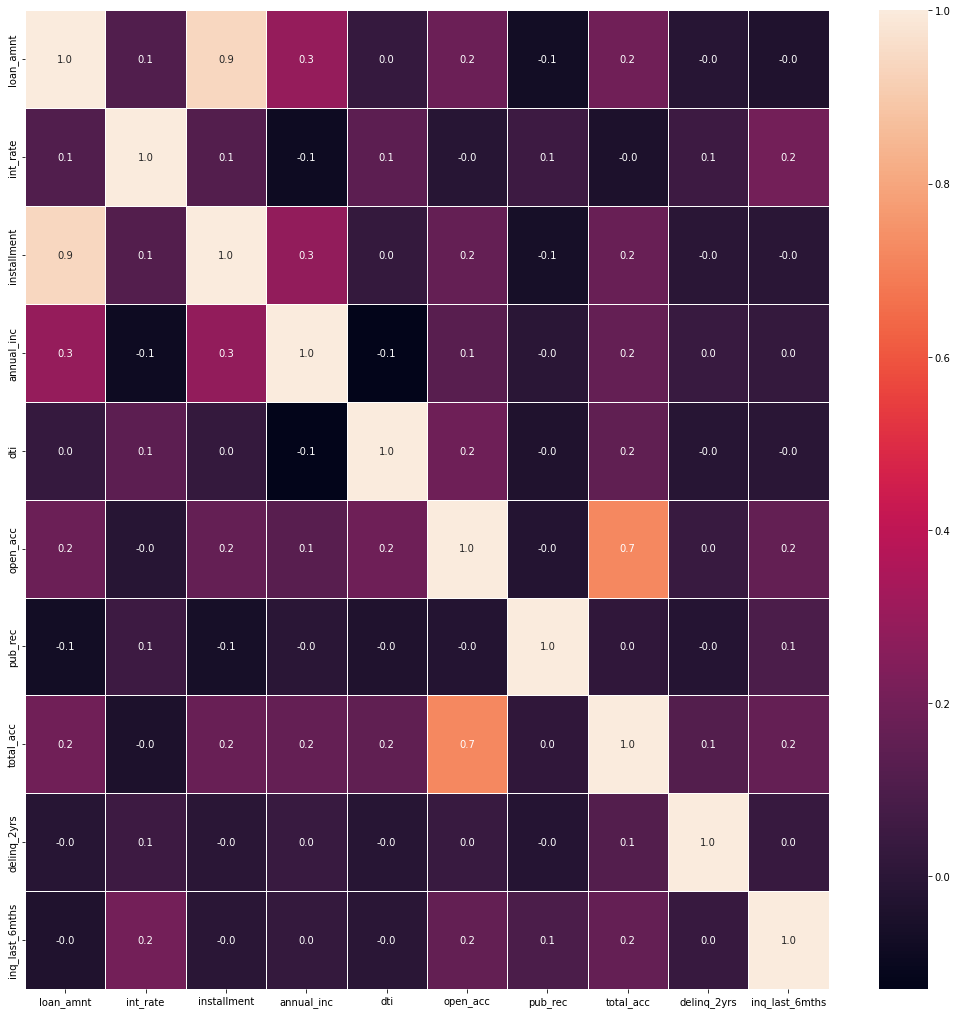

In [ ]:
fig,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


<AxesSubplot:>

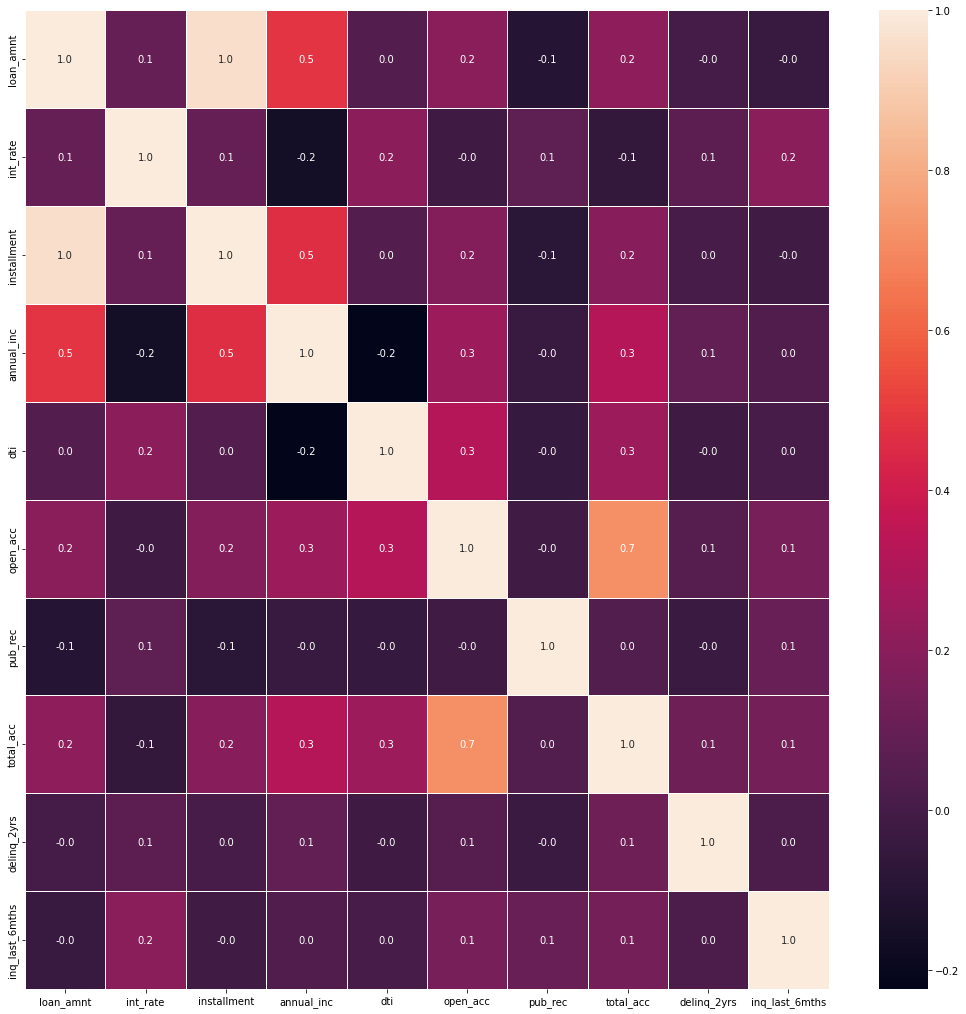

In [ ]:
fig,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(method='spearman'), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


In [ ]:
NON_DEFAULT_CATEGORIES = [
    "Fully Paid",
]
TARGET_VARIABLE = "default"

df[TARGET_VARIABLE] = df["loan_status"].isin(NON_DEFAULT_CATEGORIES).astype(float)

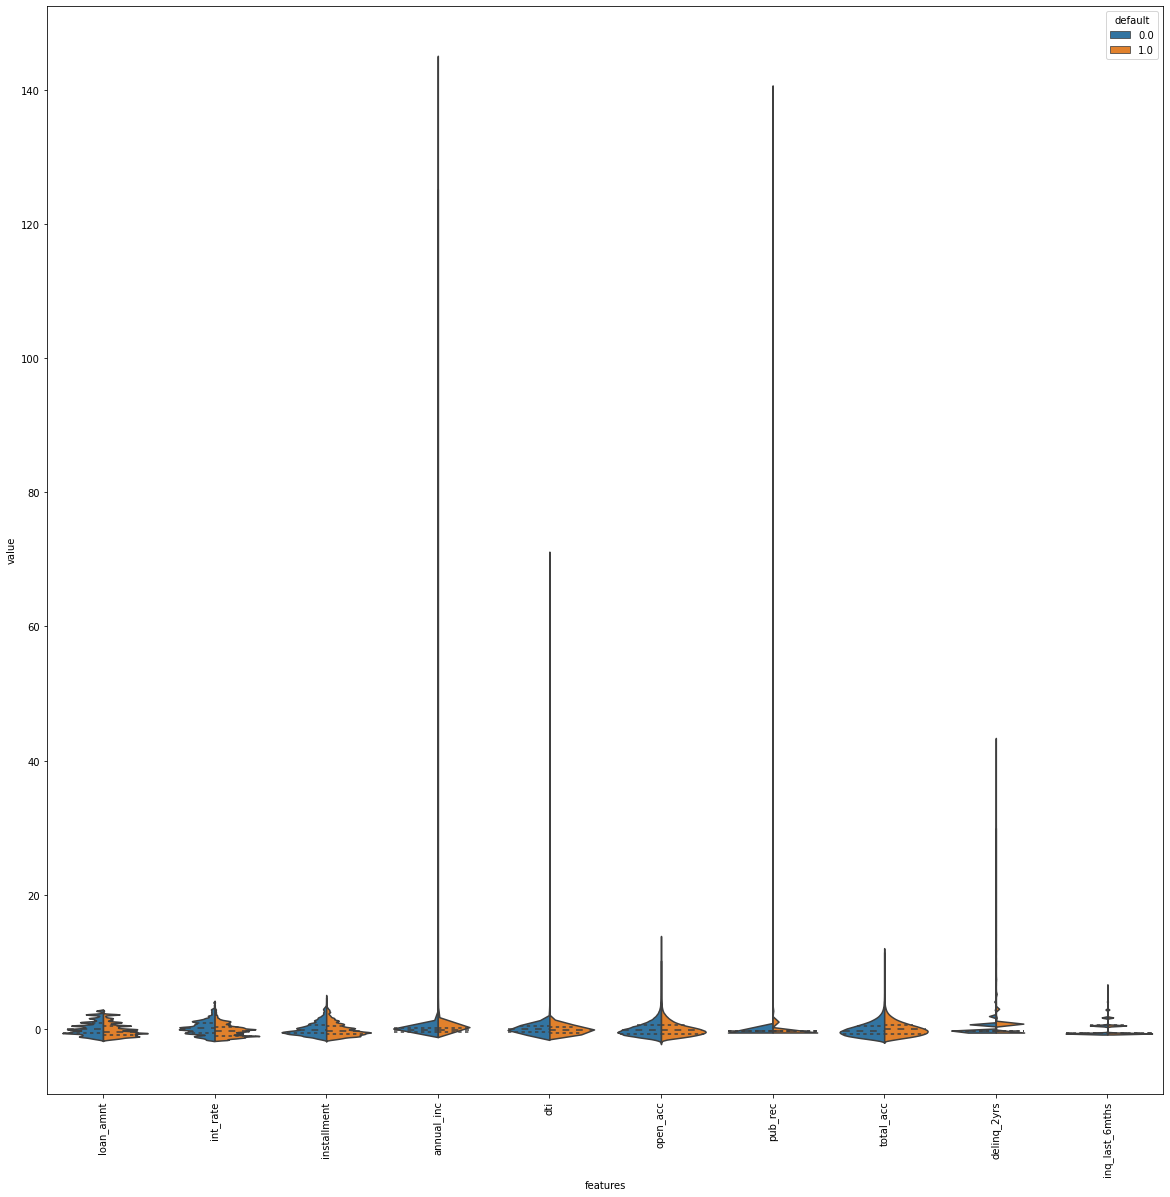

In [ ]:
y = df[TARGET_VARIABLE]
numerical_features_df = df[numerical_features]

# Standardize the numerical features
numerical_features_df = pd.DataFrame(StandardScaler().fit_transform(numerical_features_df), columns=numerical_features)

# Concatenate the target variable and standardized numerical features
temp_df = pd.concat([y, numerical_features_df], axis=1)

temp_df = pd.melt(temp_df, id_vars=TARGET_VARIABLE, var_name='features', value_name='value')

plt.figure(figsize=(20, 20))
sns.violinplot(x="features", y="value", hue=TARGET_VARIABLE, data=temp_df,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()


In [ ]:
categorical_features_df = df[categorical_features]
categorical_features_df.drop(columns=['id'], inplace=True)
# Standardize the categorical features
chi2_scores, p_values = chi2(categorical_features_df, y)

ValueError: could not convert string to float: ' 36 months'

In [ ]:
categorical_features_df

,term,grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line,initial_list_status
0,36 months,C,leadman,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,debt_consolidation,PA,Aug-2003,w
1,36 months,C,Engineer,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,small_business,SD,Dec-1999,w
2,60 months,B,truck driver,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,home_improvement,IL,Aug-2000,w
3,60 months,C,Information Systems Officer,10+ years,MORTGAGE,Source Verified,Dec-2015,Current,debt_consolidation,NJ,Sep-2008,w
4,60 months,F,Contract Specialist,3 years,MORTGAGE,Source Verified,Dec-2015,Fully Paid,major_purchase,PA,Jun-1998,w
...,...,...,...,...,...,...,...,...,...,...,...,...
575774,36 months,C,Account Specialist,2 years,RENT,Source Verified,Aug-2017,Current,debt_consolidation,CA,Apr-2010,w
575775,60 months,B,CRM,< 1 year,MORTGAGE,Not Verified,Aug-2017,Current,home_improvement,MI,Nov-1987,w
575776,36 months,B,AEO parks,10+ years,RENT,Source Verified,Aug-2017,Current,debt_consolidation,NY,Sep-2013,f
575777,60 months,C,Program Management Analyst,< 1 year,MORTGAGE,Not Verified,Aug-2017,Current,debt_consolidation,MO,Mar-2007,w
